## Task 1
## Importing the libraries

In [36]:
import util_mnist_reader
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

## Splitting the data into validation and normalising

In [43]:
X_train, Y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, Y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

X_train=X_train/255.0
X_test=X_test/255.0

y_train = tf.keras.utils.to_categorical(Y_train, 10)
y_test = tf.keras.utils.to_categorical(Y_test, 10)
y_val = tf.keras.utils.to_categorical(Y_val, 10)

# Set the hyperparameters
m = 60000
input_nodes = 784     #No. of neurons in first layer
# n_h = 500   #No. of neurons in hidden layer
hidden_nodes = 600
output_nodes = 10     #No. of neurons in output layer
epochs = 50
learning_rate = 0.05

### Activation function for hidden nodes

In [44]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### Activation function for output nodes

In [45]:
def softmax(z):
    a = np.exp(z - z.max(axis=0, keepdims=True))
    return a / a.sum(axis = 0, keepdims=True)

In [46]:
def calculate_cost(A2, Y):
    cost = np.mean(-Y*(np.log(A2)))
    return cost

### This part contains the feedforward and back propagation
##### The equations were refferd from online source medium.com

In [47]:
def model(X, Y, input_nodes, hidden_nodes, output_nodes, epochs, learning_rate):
#     parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = np.random.randn(hidden_nodes, input_nodes)
    b1 = np.ones((hidden_nodes, 1))
    W2 = np.random.randn(output_nodes, hidden_nodes)
    b2 = np.ones((output_nodes, 1))
    

    
    for i in range(0, epochs+1):
#         a2, cache = forward_prop(X, parameters)
        Z1 = np.dot(W1, X.T) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = softmax(Z2)
        loss = calculate_cost(A2, Y.T)
        
        training_loss.append(loss)        
      
        print("Training_Loss",i," --- ",loss)
        
        y_pred_labels = np.argmax(A2.T, axis=1)
        accuracy = metrics.accuracy_score(Y_train, y_pred_labels)
        print("Training_accuracy",i," --- ",accuracy)     
        training_accuracy.append(accuracy)
        
        Z1_v = np.dot(W1, X_val.T) + b1
        A1_v = sigmoid(Z1_v)
        Z2_v = np.dot(W2, A1_v) + b2
        A2_v = softmax(Z2_v)
        val_loss = calculate_cost(A2_v, y_val.T)
        print("validation_Loss",i," --- ",val_loss)
        validation_loss.append(val_loss)
        
        y_val_pred_labels = np.argmax(A2_v.T, axis=1)
        val_accuracy = metrics.accuracy_score(Y_val, y_val_pred_labels)
        print("Validation_accuracy",i," --- ",val_accuracy)     
        validation_accuracy.append(val_accuracy)
        
        
        dZ2 = A2 - Y.T
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        
        W2 = W2 - learning_rate*dW2
        b2 = b2 - learning_rate*db2
        
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
        dW1 = np.dot(dZ1, X)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m
        
        W1 = W1 - learning_rate*dW1
        b1 = b1 - learning_rate*db1

        
    return W1,b1,W2,b2

In [48]:
training_loss = []
validation_loss = []

training_accuracy = []
validation_accuracy =[]

W1,b1,W2,b2 = model(X_train, y_train, input_nodes, hidden_nodes, output_nodes, epochs, learning_rate)

Training_Loss 0  ---  1.7064938204872255
Training_accuracy 0  ---  0.1428148148148148


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


validation_Loss 0  ---  1.7267631292241203
Validation_accuracy 0  ---  0.13533333333333333
Training_Loss 1  ---  1.3769452204576822
Training_accuracy 1  ---  0.11846296296296296
validation_Loss 1  ---  1.487824830148155
Validation_accuracy 1  ---  0.112
Training_Loss 2  ---  1.0997954495374782
Training_accuracy 2  ---  0.16324074074074074
validation_Loss 2  ---  1.2437234666226706
Validation_accuracy 2  ---  0.14616666666666667
Training_Loss 3  ---  0.9710885698062948
Training_accuracy 3  ---  0.18453703703703703
validation_Loss 3  ---  1.1433168062004724
Validation_accuracy 3  ---  0.1645
Training_Loss 4  ---  0.8721537592736328
Training_accuracy 4  ---  0.19953703703703704
validation_Loss 4  ---  1.065148725024469
Validation_accuracy 4  ---  0.1765
Training_Loss 5  ---  0.7945170462942519
Training_accuracy 5  ---  0.2297962962962963
validation_Loss 5  ---  0.9922439674724899
Validation_accuracy 5  ---  0.19616666666666666
Training_Loss 6  ---  0.7265598208155263
Training_accuracy 6  

validation_Loss 47  ---  0.42134274477326233
Validation_accuracy 47  ---  0.5083333333333333
Training_Loss 48  ---  0.26321079399041153
Training_accuracy 48  ---  0.6139074074074075
validation_Loss 48  ---  0.4185562725359036
Validation_accuracy 48  ---  0.509
Training_Loss 49  ---  0.26105787290369625
Training_accuracy 49  ---  0.6158518518518519
validation_Loss 49  ---  0.4140252227903284
Validation_accuracy 49  ---  0.5111666666666667
Training_Loss 50  ---  0.25896646492052283
Training_accuracy 50  ---  0.6178703703703704
validation_Loss 50  ---  0.4112315445010294
Validation_accuracy 50  ---  0.5133333333333333


### Testing the model 

In [49]:
Z1_test = np.dot(W1, X_test.T) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(W2, A1_test) + b2
A2_test = softmax(Z2_test)
test_cost = calculate_cost(A2_test, y_test.T)

print(test_cost)
print("\n")
y_test_labels = np.argmax(A2_test.T, axis=1)
test_accuracy = metrics.accuracy_score(Y_test, y_test_labels)
print("test accuracy:",test_accuracy)
print("\nConfusion matrix")
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_labels)
print(confusion_matrix)
print("\nReport")
report = metrics.classification_report(Y_test, y_test_labels, target_names=None)
print(report)   


0.26559970289684354


test accuracy: 0.6105

Confusion matrix
[[595  31  34  93  27   6 180   3  29   2]
 [ 30 851  14  64  16   4  15   0   6   0]
 [ 38  11 494  19 209  11 189   1  24   4]
 [103  79  33 630  84   5  46   0  16   4]
 [ 25  17 195  69 479   3 174   1  37   0]
 [  8  10  20  18  14 481   3 185  92 169]
 [162  17 179  58 184   6 357   2  35   0]
 [  0   0   3   2   4 159   0 695  36 101]
 [ 35   4  17  12  27  74  40  44 733  14]
 [  1   0  12   0   1  96   7  75  18 790]]

Report
             precision    recall  f1-score   support

          0       0.60      0.59      0.60      1000
          1       0.83      0.85      0.84      1000
          2       0.49      0.49      0.49      1000
          3       0.65      0.63      0.64      1000
          4       0.46      0.48      0.47      1000
          5       0.57      0.48      0.52      1000
          6       0.35      0.36      0.36      1000
          7       0.69      0.69      0.69      1000
          8       0.7

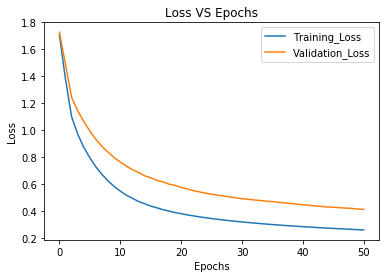

In [50]:
plt.plot(training_loss, label = 'Training_Loss')
plt.plot(validation_loss, label = 'Validation_Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Loss VS Epochs")
plt.legend()


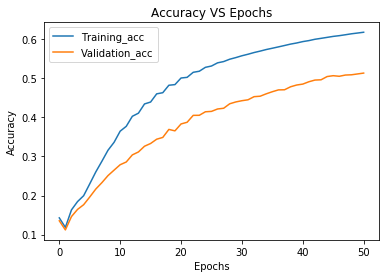

In [51]:
#print(y_test[2])
plt.plot(training_accuracy, label = 'Training_acc')
plt.plot(validation_accuracy, label = 'Validation_acc')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title("Accuracy VS Epochs")
plt.legend()

## Task 2

In [11]:
X_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

### Normalising the data

In [12]:
print(X_train.shape)
print(y_train.shape)

X_train = X_train/255.0
X_test = X_test/255.0

(60000, 784)
(60000,)


### Architecture of the model

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (784,)),
    keras.layers.Dense(300, activation = 'sigmoid'),
    keras.layers.Dense(100, activation = 'sigmoid'),
    keras.layers.Dense(50,activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax') 
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer = keras.optimizers.SGD(lr = 0.01),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 74us/step - loss: 2.2885 - acc: 0.1590 - val_loss: 2.2671 - val_acc: 0.2148
Epoch 2/20
54000/54000 [==============================] - 4s 67us/step - loss: 2.2122 - acc: 0.3213 - val_loss: 2.1110 - val_acc: 0.2937
Epoch 3/20
54000/54000 [==============================] - 4s 67us/step - loss: 1.8770 - acc: 0.4022 - val_loss: 1.6671 - val_acc: 0.5137
Epoch 4/20
54000/54000 [==============================] - 4s 66us/step - loss: 1.5116 - acc: 0.5399 - val_loss: 1.3536 - val_acc: 0.5770
Epoch 5/20
54000/54000 [==============================] - 4s 67us/step - loss: 1.2431 - acc: 0.5917 - val_loss: 1.1428 - val_acc: 0.6105
Epoch 6/20
54000/54000 [==============================] - 4s 67us/step - loss: 1.0883 - acc: 0.6104 - val_loss: 1.0239 - val_acc: 0.6302
Epoch 7/20
54000/54000 [==============================] - 4s 67us/step - loss: 0.9902 - acc: 0.6313 - val_loss: 0.9384 - val_acc:

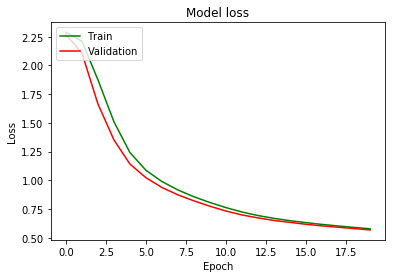

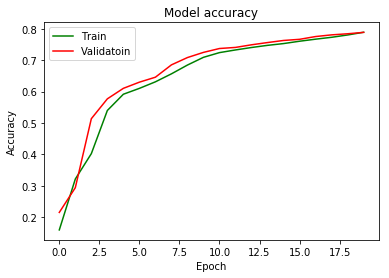

In [16]:
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'r')
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

plt.plot(history.history['acc'],'g')
plt.plot(history.history['val_acc'],'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validatoin'], loc='upper left')
plt.show()

In [17]:
score = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 29us/step


In [18]:
print('\n', 'Test accuracy:',score[1])


 Test accuracy: 0.7809


In [19]:
predictions = model.predict(X_test)
predictions[0]

array([4.5644441e-07, 1.5917125e-04, 3.2329012e-06, 4.3971293e-05,
       1.9901976e-04, 1.3571414e-01, 7.1513114e-06, 3.0239728e-01,
       2.9801310e-03, 5.5849546e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
y_test[0]

9

### Confusion Matrix

In [22]:
y_pred_labels = np.argmax(predictions, axis=1)
confusionmatrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_labels)
print(confusionmatrix)

[[801   3  11  87   5   6  73   0  14   0]
 [  2 938  15  34   6   1   2   0   2   0]
 [ 20   3 664  12 176   0 117   0   8   0]
 [ 66  13   7 823  34   2  50   0   4   1]
 [  0   2 188  35 728   0  40   0   7   0]
 [  0   1   0   0   0 887   0  67   8  37]
 [241   4 236  56 174   2 263   0  24   0]
 [  0   0   0   0   0  69   0 860   0  71]
 [  1   1   6   9   3  19  35   3 922   1]
 [  0   0   0   0   0  23   0  53   1 923]]


### Report of the model

In [23]:
report = metrics.classification_report(y_test, y_pred_labels, target_names=None)
print(report)   

             precision    recall  f1-score   support

          0       0.71      0.80      0.75      1000
          1       0.97      0.94      0.95      1000
          2       0.59      0.66      0.62      1000
          3       0.78      0.82      0.80      1000
          4       0.65      0.73      0.68      1000
          5       0.88      0.89      0.88      1000
          6       0.45      0.26      0.33      1000
          7       0.87      0.86      0.87      1000
          8       0.93      0.92      0.93      1000
          9       0.89      0.92      0.91      1000

avg / total       0.77      0.78      0.77     10000



## Task3

In [24]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### One hot encoding

In [25]:
def conv_vector(y):
    vect = np.zeros((y.shape[0],10))
    for index in range(y.shape[0]):
        vect[index][y[index]] = 1
    return vect

In [26]:
Y_train = conv_vector(y_train)
Y_test = conv_vector(y_test)

### architecture of the model

In [27]:
model = tf.keras.Sequential()# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape =(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(784, activation='sigmoid'))
# model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))# Take a look at the model summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [28]:
model.compile(loss='categorical_crossentropy',
             optimizer = keras.optimizers.Adam(lr = 0.001),
             metrics=['accuracy'])

In [29]:
history = model.fit(X_train,
         Y_train,
         batch_size=64,
         epochs=20,
         validation_split = 0.1
         )

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 58s 1ms/step - loss: 0.6103 - acc: 0.7744 - val_loss: 0.3880 - val_acc: 0.8557
Epoch 2/20
54000/54000 [==============================] - 57s 1ms/step - loss: 0.4211 - acc: 0.8467 - val_loss: 0.3433 - val_acc: 0.8730
Epoch 3/20
54000/54000 [==============================] - 57s 1ms/step - loss: 0.3754 - acc: 0.8642 - val_loss: 0.3107 - val_acc: 0.8853
Epoch 4/20
54000/54000 [==============================] - 55s 1ms/step - loss: 0.3471 - acc: 0.8743 - val_loss: 0.2868 - val_acc: 0.8948
Epoch 5/20
54000/54000 [==============================] - 56s 1ms/step - loss: 0.3275 - acc: 0.8794 - val_loss: 0.2740 - val_acc: 0.9018
Epoch 6/20
54000/54000 [==============================] - 59s 1ms/step - loss: 0.3093 - acc: 0.8854 - val_loss: 0.2573 - val_acc: 0.9045
Epoch 7/20
54000/54000 [==============================] - 59s 1ms/step - loss: 0.2967 - acc: 0.8909 - val_loss: 0.2509 - val_acc:

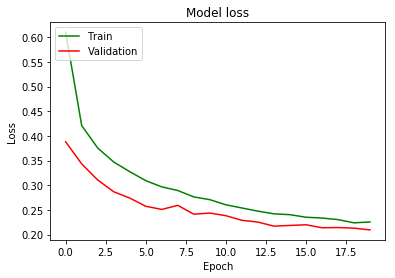

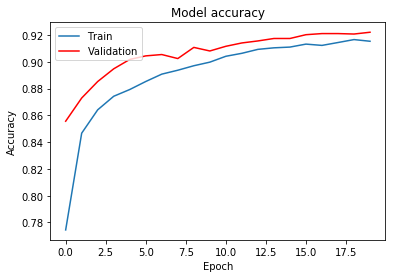

In [30]:
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'r')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'],'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [31]:
score = model.evaluate(X_test,Y_test)
print("\n",'Test accuracy:\n',score[1])

10000/10000 [==============================] - 3s 265us/step

 Test accuracy:
 0.9196


In [32]:
prediction = model.predict(X_test)

In [33]:
np.argmax(prediction[0])

9

### Confusion Matrix

In [34]:
y_pred_labels = np.argmax(prediction, axis=1)
confusionmatrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_labels)
print(confusionmatrix)

[[899   0  14  15   2   1  65   0   4   0]
 [  0 982   0  14   2   0   0   0   2   0]
 [ 18   1 895  10  38   0  38   0   0   0]
 [ 10   8   7 926  25   0  22   0   2   0]
 [  0   0  52  23 882   0  43   0   0   0]
 [  0   0   0   0   0 978   0  15   0   7]
 [113   0  65  29  79   0 709   0   5   0]
 [  0   0   0   0   0   3   0 984   0  13]
 [  1   2   1   7   3   1   2   2 980   1]
 [  0   0   0   0   0   4   1  34   0 961]]


In [35]:
report = metrics.classification_report(y_test, y_pred_labels, target_names=None)
print(report)   

             precision    recall  f1-score   support

          0       0.86      0.90      0.88      1000
          1       0.99      0.98      0.99      1000
          2       0.87      0.90      0.88      1000
          3       0.90      0.93      0.92      1000
          4       0.86      0.88      0.87      1000
          5       0.99      0.98      0.98      1000
          6       0.81      0.71      0.75      1000
          7       0.95      0.98      0.97      1000
          8       0.99      0.98      0.98      1000
          9       0.98      0.96      0.97      1000

avg / total       0.92      0.92      0.92     10000

